In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("diabetes.csv")

In [3]:
df = dataframe # Creating a Copy of the Dataframe

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Checking for Null Values
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [9]:
# Set the Independent Parameters(x) and the Target Variable(y)
x = df.drop("Outcome",axis=1)
y = df["Outcome"]
from sklearn.model_selection import train_test_split

In [10]:
# Split the Data into Training and Testing Parts
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Iterative/Elbow Method to find the Optimal K
accuracy_values = []
from sklearn import metrics
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)

In [13]:
# Select the Optimal K based on the Optimal Accuracy Score
optimal_k = -1
optimal_accuracy = -1

for i in list(zip(range(1,20),accuracy_values)):
    if i[1]>optimal_accuracy:
        optimal_accuracy = i[1]
        optimal_k = i[0]

In [14]:
# Train the Model on Optimal K
knn = KNeighborsClassifier(n_neighbors = optimal_k)

In [15]:
# Fit the Model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [16]:
y_pred = knn.predict(x_test)

In [17]:
# Generate the Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

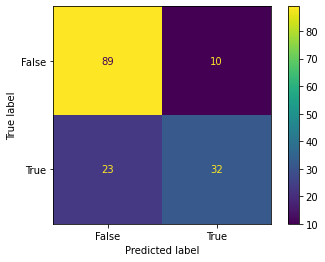

In [18]:
# Plot the Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = ["False","True"])
cm_display.plot()

In [19]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
# Can Find the Metrics Manually as well :
# Recall = TP/TP+FN
# Precision = TP/TP+FP
# F1 Score = (Recall*Precision)/(Recall+Precision)
# Accuracy = TP+TN/TP+FP+FN+TN

# The Elements from the Confusion Matrix Can be accessed as confusion_matrix[0][0], etc
# Errors can be found as metrics.mean_absolute_error(y_test,y_pred) if required